<div style="color: white; background-color: black; font-size: 28px; font-weight: bold; text-align: center; padding: 20px;">
POISONOUS & EDIBLES DETECTION (CNN)
</div>

### It appears to be a Convolutional Neural Network (CNN) based image classification model to differentiate between poisonous and edible items, likely mushrooms or food items. Based on that context, here is a well-structured.

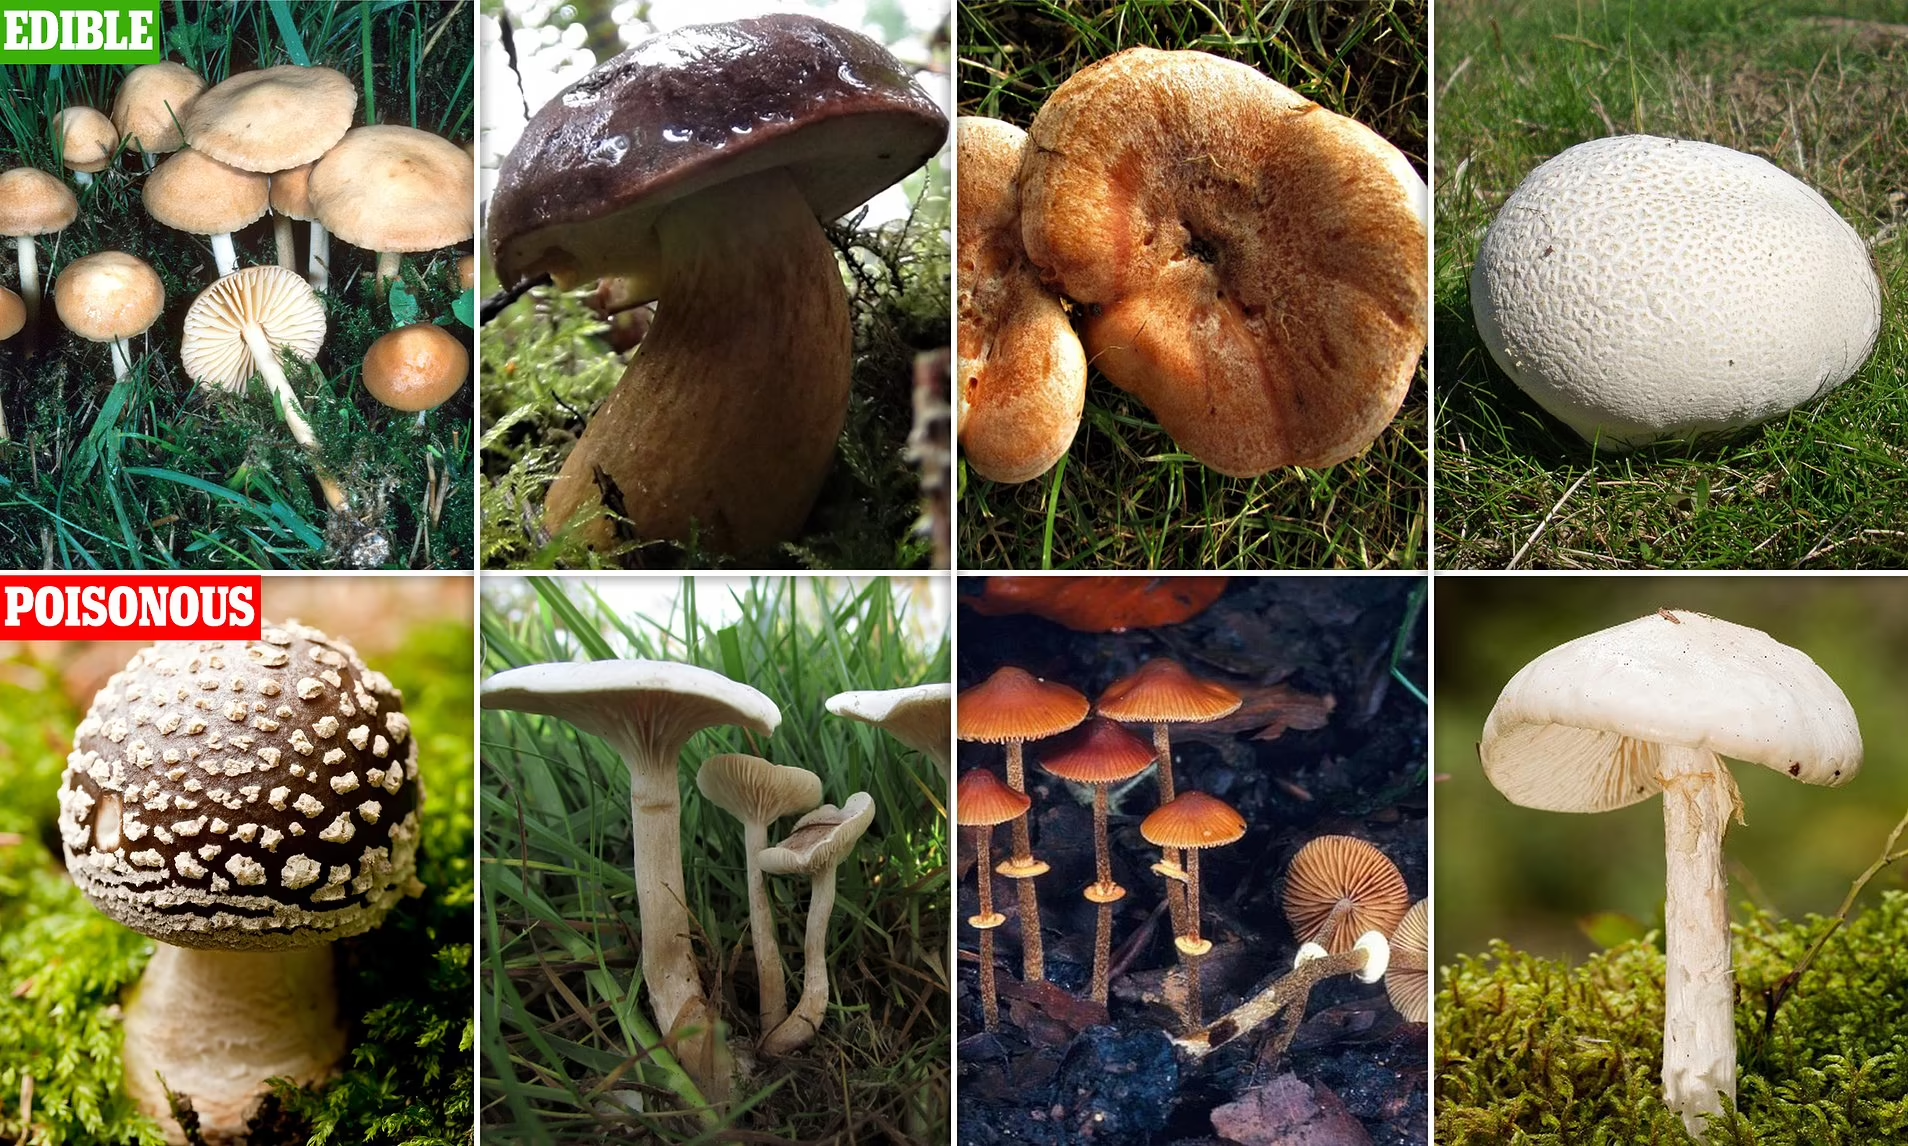

## PROJECT PROCESSES:

* IMPORT LIBRARIES
* DATA SET CREATION $ DATA SET LOADING
* IMAGE VISUALIZATION
* DATA SPLITTING
* MODEL CREATION (CNN)
* MODEL CONFIGURATION
* MODEL TRAINNING
* MODEL EVALUATION

## IMPORT LIBRARIES:

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from tensorflow.keras.utils import to_categorical, plot_model
import os

In [2]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])
#1-poisonous
#0-edibles

OneHotEncoder()

## DATA SET CREATION:

### Poisonous Images

In [3]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"C:\Users\Hp\Downloads\Poisonous"):
    for file in f:
        if'.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)#extracting pixel values from image object
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

### Edibles Images:

In [4]:
paths=[]
for r,d,f in os.walk(r"C:\Users\Hp\Downloads\Edible"):
    for file in f:
        if '.jpg' in file or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())#converting binary vector to array

In [5]:
data=np.array(data)#list to array conversion
data.shape

(542, 128, 128, 3)

In [6]:
result=np.array(result)
result=result.reshape(542,2)

## VISUALIZATION:

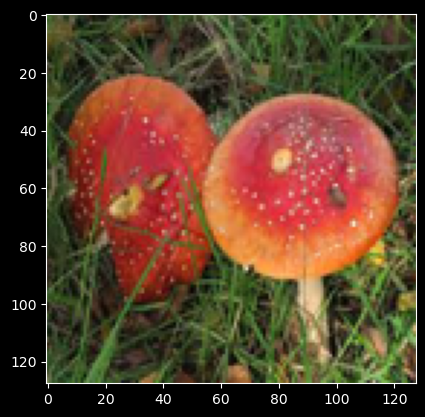

In [7]:
plt.imshow(data[0])

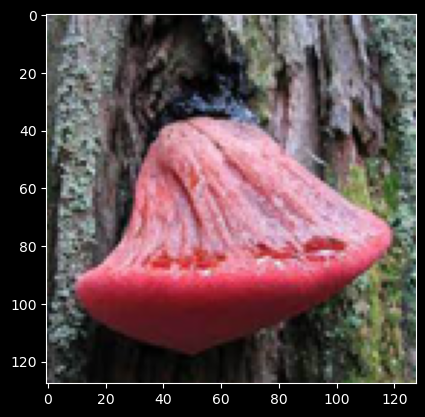

In [8]:
plt.imshow(data[500])

## DATA SPLITTING:

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

## MODEL CREATION (CNN):

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,1

 Total params: 8,452,930 (32.25 MB)

 Trainable params: 8,452,610 (32.24 MB)

 Non-trainable params: 320 (1.25 KB)

None


## MODEL CONFIGURATION:

In [11]:
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [12]:
x_train.shape

(433, 128, 128, 3)

In [13]:
y_train.shape

(433, 2)

## MODEL TRAINNING:

In [14]:
history=model.fit(x_train,y_train,epochs=50,batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5335 - loss: 1.6869 - val_accuracy: 0.5229 - val_loss: 0.7189
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6120 - loss: 1.2987 - val_accuracy: 0.4312 - val_loss: 0.9464
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6490 - loss: 0.9476 - val_accuracy: 0.5872 - val_loss: 0.6182
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7413 - loss: 0.7291 - val_accuracy: 0.6881 - val_loss: 0.5990
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7760 - loss: 0.5858 - val_accuracy: 0.6055 - val_loss: 0.6088
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7644 - loss: 0.5909 - val_accuracy: 0.6972 - val_loss: 0.5750
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7529 - loss: 0.6047 - val_accuracy: 0.7890 - val_loss: 0.5348
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7691 - loss: 0.5453 - val_accuracy: 0.8440 - val_loss: 0.5070
Epoch 9/

## MODEL EVALUATION:

In [15]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\nTest accuracy:%.1f%%" % (100.0*score[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.8257 - loss: 0.4239

Test accuracy:82.6%
